# Problem Statement

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

**Goal and objective:** The objective of this exercise is to build a model, using historical data that will 
determine an optimum weight of the product to be shipped each time to the warehouse.

Also try to analysis the demand pattern in different pockets of the country so management can drive 
the advertisement campaign particular in those pockets.
    
This is the first phase of the agreement; hence, company has shared very limited information. Once 
you are able to showcase a tangible impact with this much of information then company will open the 
360 degree data lake for your consulting company to build a more robust model.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset and necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('Data.csv')

In [6]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


## Data Dictionary

In [7]:
data_dict = pd.read_excel("data_dict.xlsx")

In [8]:
pd.set_option('display.max_colwidth', None)
data_dict

,Variable,Business Definition
0,Ware_house_ID,Product warehouse ID
1,WH_Manager_ID,Employee ID of warehouse manager
2,Location_type,Location of warehouse like in city or village
3,WH_capacity_size,Storage capacity size of the warehouse
4,zone,Zone of the warehouse
5,WH_regional_zone,Regional zone of the warehouse under each zone
6,num_refill_req_l3m,Number of times refilling has been done in last 3 months
7,transport_issue_l1y,Any transport issue like accident or goods stolen reported in last one year
8,Competitor_in_mkt,Number of instant noodles competitor in the market
9,retail_shop_num,Number of retails shop who sell the product under the warehouse area


In [9]:
pd.reset_option('display.width')

## Data Preprocessing

In [10]:
print("The dataset contains",df.shape[0],"rows.","\nThe dataset contains",df.shape[1],"columns.")

The dataset contains 25000 rows. 
The dataset contains 24 columns.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [12]:
print("Null values present in each feature (in %):")
df.isnull().sum()*100/df.shape[0]

Null values present in each feature (in %):


Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [13]:
print("Number of Duplicate entries present in Dataset:",df.duplicated().sum())

Number of Duplicate entries present in Dataset: 0


In [14]:
df.groupby(['zone','WH_regional_zone','WH_capacity_size']).median()['wh_est_year'].round()

zone   WH_regional_zone  WH_capacity_size
East   Zone 1            Small               2011.0
       Zone 3            Mid                 2008.0
       Zone 4            Mid                 2007.0
       Zone 5            Large               2008.0
       Zone 6            Small               2008.0
North  Zone 1            Small               2009.0
       Zone 2            Mid                 2010.0
       Zone 3            Mid                 2010.0
       Zone 4            Mid                 2009.0
       Zone 5            Large               2009.0
       Zone 6            Large               2009.0
                         Small               2009.0
South  Zone 1            Small               2010.0
       Zone 2            Mid                 2009.0
       Zone 3            Mid                 2010.0
       Zone 4            Mid                 2010.0
       Zone 5            Large               2010.0
       Zone 6            Large               2008.0
                      

Most of the values are `2009`. Hence, we are imputing the missing values in `wh_est_year` with `2009`

In [15]:
#imputation of null values
df['wh_est_year']= df['wh_est_year'].fillna(value=2009)
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode().values[0])
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].mode().values[0])

In [16]:
print("Mode for variable approved_wh_govt_certificate:",df['approved_wh_govt_certificate'].mode().values[0])
print("Mode for variable workers_num:",df['workers_num'].median())

Mode for variable approved_wh_govt_certificate: C
Mode for variable workers_num: 28.0


In [17]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [18]:
df['Zone'] = df['zone']+'-'+df['WH_regional_zone']
df= df.drop('zone',axis=1)
df = df.drop('WH_regional_zone',axis=1)

In [19]:
# Feature Transformation for 'wh_est_year' variable into "age_wh"
df['age_wh']= df['wh_est_year'].max()-df['wh_est_year']
df=df.drop('wh_est_year',axis=1)

## EDA

In [20]:
obj_typ_var = [x for x in df.columns if df[x].dtype=='object']

In [21]:
obj_typ_var.extend(['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt'
                    ,'temp_reg_mach','wh_breakdown_l3m','govt_check_l3m','electric_supply','flood_proof'
                    ,'flood_impacted'])

In [22]:
obj_typ_var.remove('Ware_house_ID')
obj_typ_var.remove('WH_Manager_ID')

Boxplot and Distplot for the variable: retail_shop_num


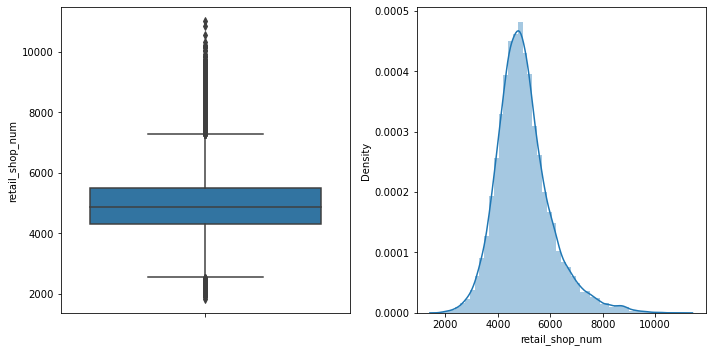

****************************************************************************************************
Boxplot and Distplot for the variable: distributor_num


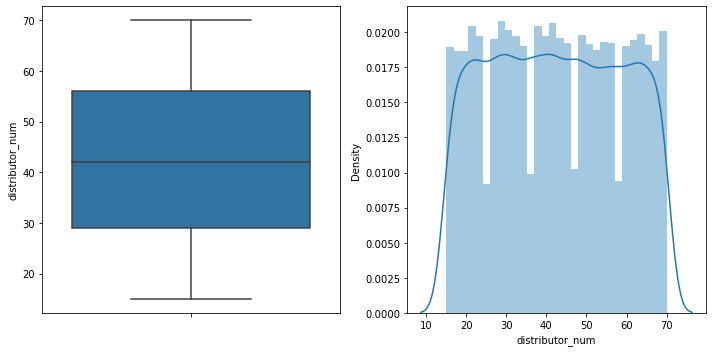

****************************************************************************************************
Boxplot and Distplot for the variable: dist_from_hub


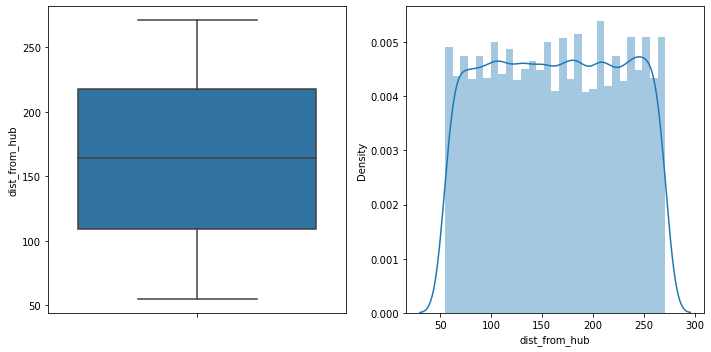

****************************************************************************************************
Boxplot and Distplot for the variable: workers_num


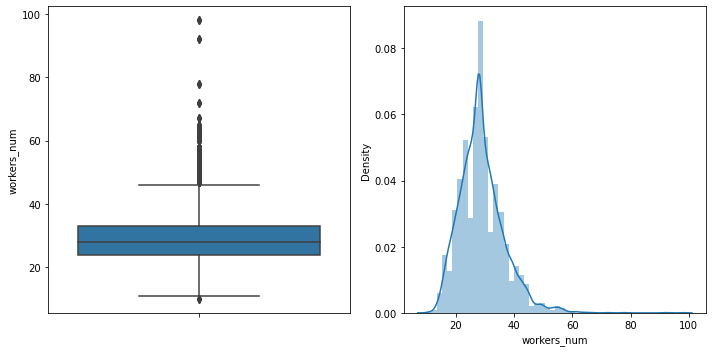

****************************************************************************************************
Boxplot and Distplot for the variable: storage_issue_reported_l3m


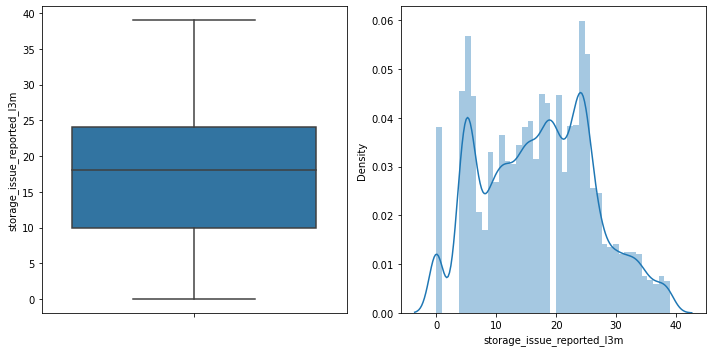

****************************************************************************************************
Boxplot and Distplot for the variable: product_wg_ton


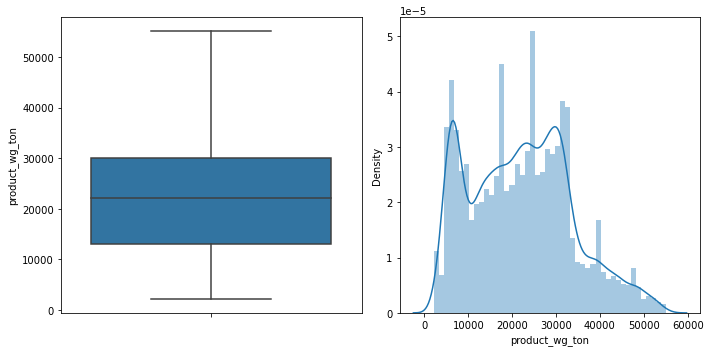

****************************************************************************************************
Boxplot and Distplot for the variable: age_wh


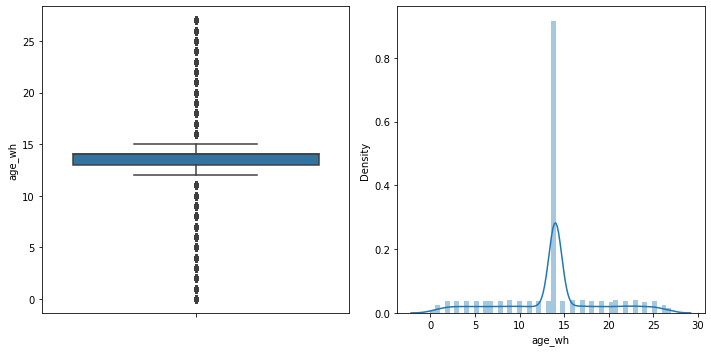

****************************************************************************************************


In [23]:
for i in df.columns:
    if (i not in obj_typ_var) and (df[i].dtype!='object'):
        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[10,5])
        print("Boxplot and Distplot for the variable:",i)
        sns.boxplot(y=i,data=df,ax=ax[0])
        sns.distplot(df[i],ax=ax[1])
        fig.tight_layout()
        plt.show()
        print('*'*100)
        

In [24]:
sorted_zone = sorted(df['Zone'].unique())

Countplot for variable: Location_type


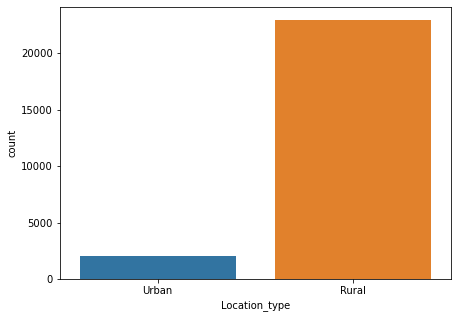

****************************************************************************************************
Countplot for variable: WH_capacity_size


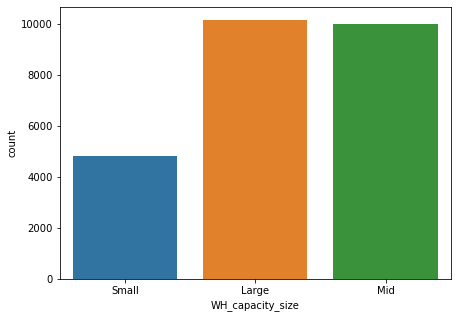

****************************************************************************************************
Countplot for variable: wh_owner_type


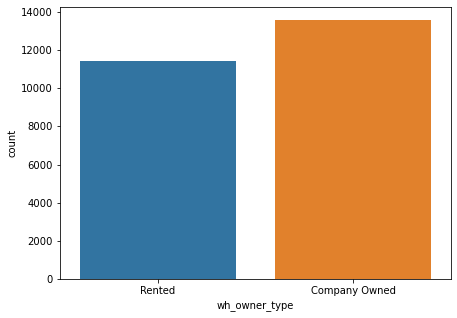

****************************************************************************************************
Countplot for variable: approved_wh_govt_certificate


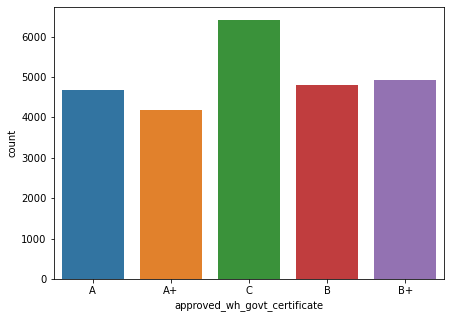

****************************************************************************************************
Countplot for variable: Zone


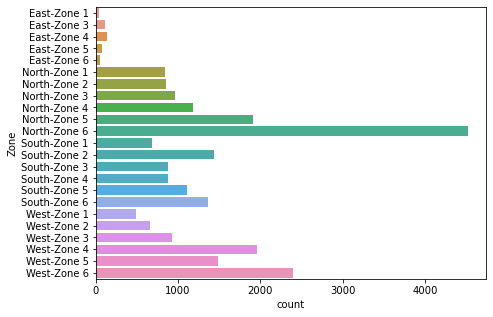

****************************************************************************************************
Countplot for variable: num_refill_req_l3m


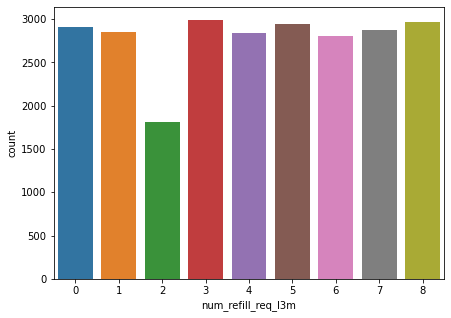

****************************************************************************************************
Countplot for variable: transport_issue_l1y


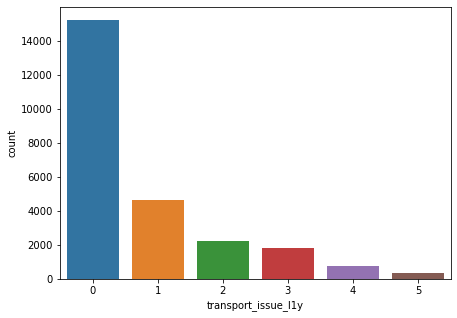

****************************************************************************************************
Countplot for variable: Competitor_in_mkt


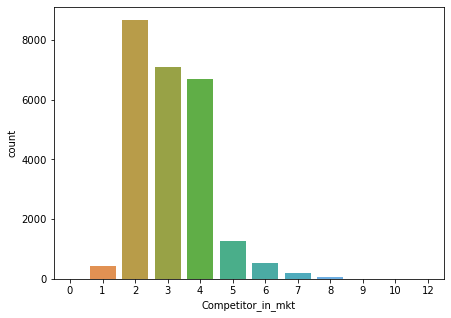

****************************************************************************************************
Countplot for variable: temp_reg_mach


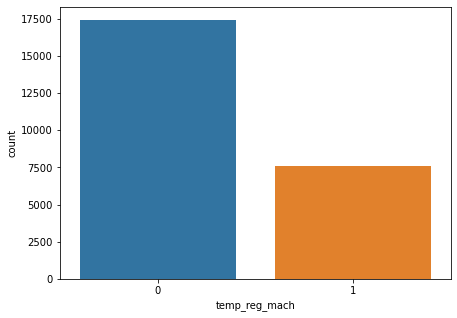

****************************************************************************************************
Countplot for variable: wh_breakdown_l3m


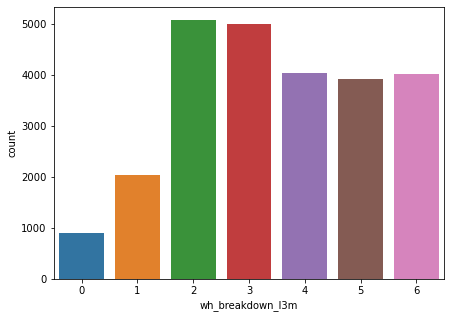

****************************************************************************************************
Countplot for variable: govt_check_l3m


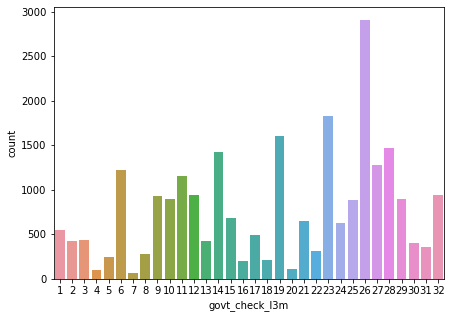

****************************************************************************************************
Countplot for variable: electric_supply


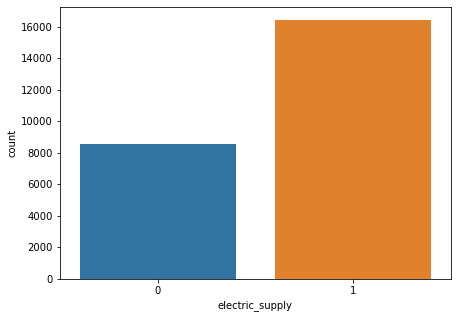

****************************************************************************************************
Countplot for variable: flood_proof


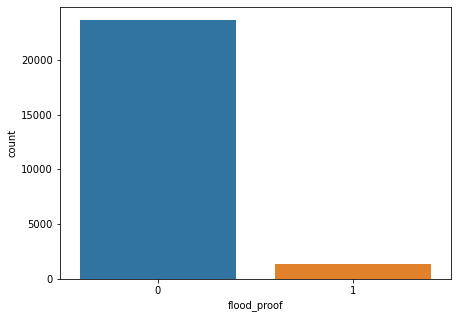

****************************************************************************************************
Countplot for variable: flood_impacted


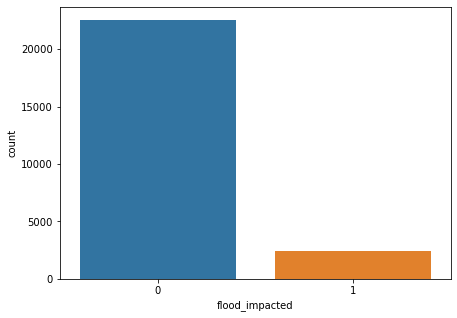

****************************************************************************************************


In [25]:
for i in obj_typ_var:
    print("Countplot for variable:",i)
    plt.figure(figsize=[7,5])
    if i != 'Zone':
        sns.countplot(df[i])
    else:
        sns.countplot(y=df[i],orient='h',order=sorted_zone)
    plt.show()
    print('*'*100)

In [26]:
corr = df.corr()

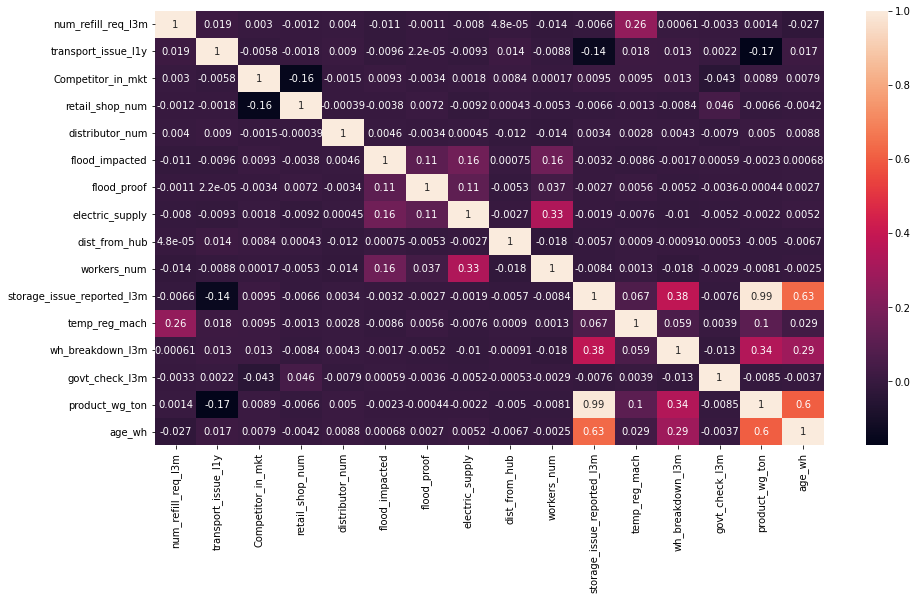

In [27]:
plt.figure(figsize=[15,8])
sns.heatmap(corr,annot=True);

<AxesSubplot:xlabel='Zone'>

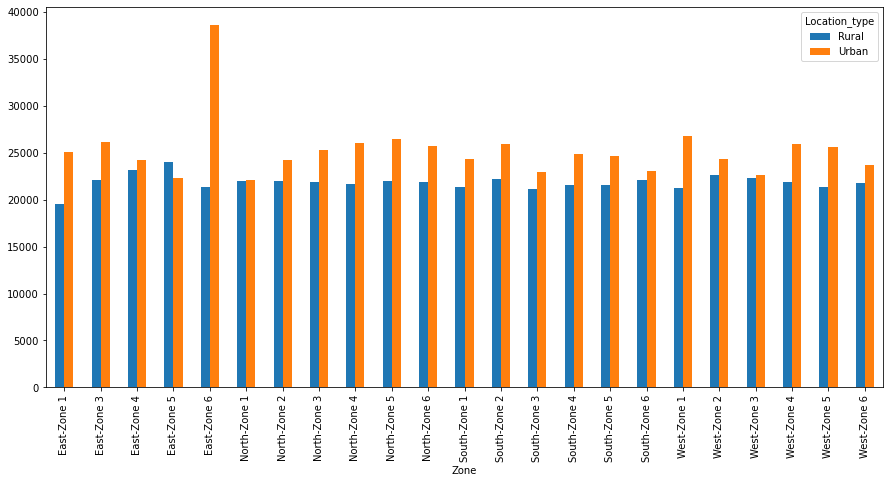

In [28]:
# sns.barplot(data=df.groupby(by=['Zone','Location_type']).mean(),x='product_wg_ton',y=df.groupby(by=['Zone','Location_type']).mean().index);
df.groupby(by=['Zone','Location_type']).mean()['product_wg_ton'].unstack().plot(kind='bar',figsize=[15,7])

In [29]:
df1 = df.drop('Ware_house_ID',axis=1)
df1 = df1.drop('WH_Manager_ID',axis=1)

In [30]:
df1.head()

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Zone,age_wh
0,Urban,Small,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115,West-Zone 6,14.0
1,Rural,Large,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074,North-Zone 5,14.0
2,Rural,Mid,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137,South-Zone 2,14.0
3,Rural,Mid,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115,North-Zone 3,14.0
4,Rural,Large,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071,North-Zone 5,14.0


In [31]:
# One hot Encoding of categorical features
dummies = ['Location_type','Zone','wh_owner_type']
for i in dummies:
    print(df1[i].value_counts(),'\n')
    df1= pd.concat([df1,pd.get_dummies(data=df1[i],drop_first=True)],axis=1).drop(i,axis=1)

Rural    22957
Urban     2043
Name: Location_type, dtype: int64 

North-Zone 6    4519
West-Zone 6     2398
West-Zone 4     1966
North-Zone 5    1917
West-Zone 5     1489
South-Zone 2    1444
South-Zone 6    1364
North-Zone 4    1186
South-Zone 5    1107
North-Zone 3     961
West-Zone 3      923
South-Zone 3     885
South-Zone 4     882
North-Zone 2     854
North-Zone 1     841
South-Zone 1     680
West-Zone 2      665
West-Zone 1      490
East-Zone 4      142
East-Zone 3      112
East-Zone 5       74
East-Zone 6       58
East-Zone 1       43
Name: Zone, dtype: int64 

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64 



In [32]:
# Replacing ordinal features with integer values
print(df1['approved_wh_govt_certificate'].value_counts(),'\n')
print(df1['WH_capacity_size'].value_counts())
df1['approved_wh_govt_certificate']= df1['approved_wh_govt_certificate'].replace(['C','B','B+','A','A+'],[0,1,2,3,4])
df1['WH_capacity_size'] = df1['WH_capacity_size'].replace(['Small','Mid','Large'],[0,1,2])

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64 

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


In [33]:
df1.head()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,age_wh,Urban,East-Zone 3,East-Zone 4,East-Zone 5,East-Zone 6,North-Zone 1,North-Zone 2,North-Zone 3,North-Zone 4,North-Zone 5,North-Zone 6,South-Zone 1,South-Zone 2,South-Zone 3,South-Zone 4,South-Zone 5,South-Zone 6,West-Zone 1,West-Zone 2,West-Zone 3,West-Zone 4,West-Zone 5,West-Zone 6,Rented
0,0,3,1,2,4651,24,0,1,1,91,29.0,13,0,3,5,15,17115,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,3,17,5074,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,4,4306,64,0,0,0,161,37.0,17,0,3,6,22,23137,14.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,7,4,2,6000,50,0,0,0,103,21.0,17,1,4,3,27,22115,14.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,3,1,2,4740,42,1,0,1,112,25.0,18,0,0,6,24,24071,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Fixing the names of features 
feat_n_fix = df1.columns.str.replace('-','_').str.replace(' ','_')
df1.columns = df1.columns.str.replace('-','_').str.replace(' ','_')

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = df1.columns
df1_scaled = sc.fit_transform(df1)
df1_scaled = pd.DataFrame(df1_scaled,columns=col)

In [36]:
df1_scaled.head()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,age_wh,Urban,East_Zone_3,East_Zone_4,East_Zone_5,East_Zone_6,North_Zone_1,North_Zone_2,North_Zone_3,North_Zone_4,North_Zone_5,North_Zone_6,South_Zone_1,South_Zone_2,South_Zone_3,South_Zone_4,South_Zone_5,South_Zone_6,West_Zone_1,West_Zone_2,West_Zone_3,West_Zone_4,West_Zone_5,West_Zone_6,Rented
0,-1.632547,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.012051,-0.450876,-0.659770,0.827956,0.898041,-0.441634,-0.429690,0.036851,3.352150,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,3.070074,1.090302
1,1.056278,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.271215,-1.433309,-0.659770,0.827956,-0.285180,-0.209944,-1.467034,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177
2,-0.288135,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.048707,-0.014239,-0.659770,0.827956,1.489652,0.369282,0.089112,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,4.038938,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177
3,-0.288135,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.024605,-0.014239,1.515679,1.527787,-0.285180,0.948508,0.001065,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,5.001457,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,1.090302
4,1.056278,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.506277,0.094921,-0.659770,-1.271537,1.489652,0.600972,0.169577,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177


In [37]:
from sklearn.cluster import KMeans

In [38]:
wss=[] #list for with in sum of squares 
for i in range(2,8): 
    km = KMeans(n_clusters=i,random_state=42)
    km.fit_transform(df1_scaled)
    wss.append(km.inertia_)

In [39]:
wss

[1003135.3328857508,
 976888.3777229057,
 951881.1895400833,
 925854.5294359152,
 899020.5239417983,
 876868.5330682208]

In [40]:
pd.DataFrame(wss).diff() #difference in sum of squares with 1 lag

,0
0,NaN
1,-26246.955163
2,-25007.188183
3,-26026.660104
4,-26834.005494
5,-22151.990874


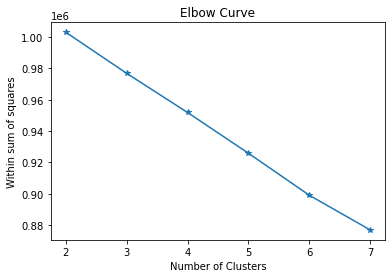

In [41]:
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within sum of squares')
plt.plot(range(2,8),wss,marker='*'); #visualizing the WSS (Elbow curve)

In [42]:
km = KMeans(n_clusters = 3,random_state=42) 
km.fit(df1_scaled) # fitting the data 
labels = km.labels_ #getting the cluster labels 

In [43]:
df1_scaled["Clus_kmeans"] = labels #appending the labels in dataset
df1_scaled.head(5)

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,age_wh,Urban,East_Zone_3,East_Zone_4,East_Zone_5,East_Zone_6,North_Zone_1,North_Zone_2,North_Zone_3,North_Zone_4,North_Zone_5,North_Zone_6,South_Zone_1,South_Zone_2,South_Zone_3,South_Zone_4,South_Zone_5,South_Zone_6,West_Zone_1,West_Zone_2,West_Zone_3,West_Zone_4,West_Zone_5,West_Zone_6,Rented,Clus_kmeans
0,-1.632547,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.012051,-0.450876,-0.659770,0.827956,0.898041,-0.441634,-0.429690,0.036851,3.352150,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,3.070074,1.090302,2
1,1.056278,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.271215,-1.433309,-0.659770,0.827956,-0.285180,-0.209944,-1.467034,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,1
2,-0.288135,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.048707,-0.014239,-0.659770,0.827956,1.489652,0.369282,0.089112,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,4.038938,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,2
3,-0.288135,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.024605,-0.014239,1.515679,1.527787,-0.285180,0.948508,0.001065,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,5.001457,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,1.090302,2
4,1.056278,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.506277,0.094921,-0.659770,-1.271537,1.489652,0.600972,0.169577,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,2


In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score # for silhouette score and sil. width calc.

In [45]:
silhouette_score(df1_scaled,labels) 

0.06469543846231254

In [46]:
sil_width = silhouette_samples(df1_scaled,labels)

In [47]:
df1_scaled["sil_width"] = sil_width #appending sil_width column in dataset
df1_scaled.head(5)

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,age_wh,Urban,East_Zone_3,East_Zone_4,East_Zone_5,East_Zone_6,North_Zone_1,North_Zone_2,North_Zone_3,North_Zone_4,North_Zone_5,North_Zone_6,South_Zone_1,South_Zone_2,South_Zone_3,South_Zone_4,South_Zone_5,South_Zone_6,West_Zone_1,West_Zone_2,West_Zone_3,West_Zone_4,West_Zone_5,West_Zone_6,Rented,Clus_kmeans,sil_width
0,-1.632547,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.012051,-0.450876,-0.659770,0.827956,0.898041,-0.441634,-0.429690,0.036851,3.352150,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,3.070074,1.090302,2,0.009102
1,1.056278,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.271215,-1.433309,-0.659770,0.827956,-0.285180,-0.209944,-1.467034,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,1,0.069293
2,-0.288135,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.048707,-0.014239,-0.659770,0.827956,1.489652,0.369282,0.089112,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,-0.288181,-0.469727,-0.167214,4.038938,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,2,0.038863
3,-0.288135,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.024605,-0.014239,1.515679,1.527787,-0.285180,0.948508,0.001065,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,5.001457,-0.223165,-0.288181,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,1.090302,2,0.006255
4,1.056278,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.506277,0.094921,-0.659770,-1.271537,1.489652,0.600972,0.169577,0.036851,-0.298316,-0.067083,-0.075581,-0.054487,-0.048222,-0.186577,-0.188064,-0.199942,-0.223165,3.470045,-0.469727,-0.167214,-0.247590,-0.19157,-0.191233,-0.215248,-0.240226,-0.141393,-0.165308,-0.195794,-0.292151,-0.251659,-0.325725,-0.917177,2,0.022091


In [48]:
sil_width.min() #min sil_width

0.0009540572034066651

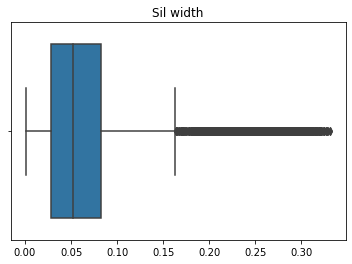

In [49]:
plt.title('Sil width')
sns.boxplot(sil_width); #distribution of sil_width

## Profiling of identified clusters

In [50]:
from sklearn.decomposition import PCA 
pc_2 = PCA(n_components=2) #Creating a PCA object 

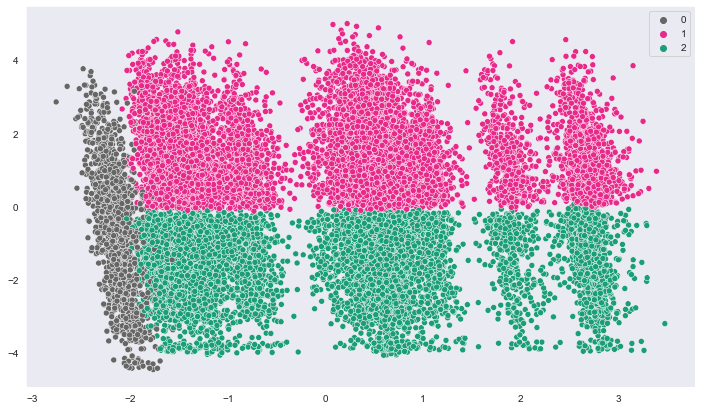

In [51]:
plot_columns = pc_2.fit_transform(df1_scaled) # Visualization of formed clusters 
plt.figure(figsize=(12,7)) 
sns.set_style("dark")
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0],
                hue=KMeans(n_clusters=3, random_state=42).fit(df1_scaled).labels_,palette='Dark2_r')
sns.set_style('white')

In [52]:
# Profiling of clusters formed
df['labels']=labels

In [53]:
df[df['labels']==0].describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Zone,age_wh,labels
count,1563,1563,1563,1563,1563.000000,1563.000000,1563.000000,1563.000000,1563,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563,1563.000000,1563.000000,1563.000000,1563,1563.000000,1563.0
unique,1563,1563,2,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,2,NaN,NaN
top,WH_100024,EID_50024,Rural,Large,NaN,NaN,NaN,NaN,Company Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,West-Zone 5,NaN,NaN
freq,1,1,1439,1563,NaN,NaN,NaN,NaN,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409,NaN,NaN,NaN,1489,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.052463,0.758157,3.573257,4802.224568,NaN,42.497761,0.087012,0.053743,0.646193,164.339731,28.834933,16.829814,0.307742,NaN,3.488804,13.973129,21759.949456,NaN,13.717210,0.0
std,NaN,NaN,NaN,NaN,2.578809,1.172831,1.244286,944.127352,NaN,16.240249,0.281943,0.225582,0.478303,62.878185,8.038934,9.308235,0.461707,NaN,1.709459,5.527076,11789.862553,NaN,5.518854,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,2008.000000,NaN,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,NaN,0.000000,5.000000,3058.000000,NaN,0.000000,0.0
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,3.000000,4235.500000,NaN,28.500000,0.000000,0.000000,0.000000,109.000000,24.000000,9.000000,0.000000,NaN,2.000000,10.000000,12121.500000,NaN,13.000000,0.0
50%,NaN,NaN,NaN,NaN,4.000000,0.000000,4.000000,4681.000000,NaN,43.000000,0.000000,0.000000,1.000000,167.000000,28.000000,17.000000,0.000000,NaN,3.000000,14.000000,22058.000000,NaN,14.000000,0.0
75%,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5216.000000,NaN,57.000000,0.000000,0.000000,1.000000,218.000000,32.000000,24.000000,1.000000,NaN,5.000000,14.000000,29147.500000,NaN,14.000000,0.0


In [54]:
df[df['labels']==1].describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Zone,age_wh,labels
count,10541,10541,10541,10541,10541.000000,10541.000000,10541.000000,10541.000000,10541,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541,10541.000000,10541.000000,10541.000000,10541,10541.000000,10541.0
unique,10541,10541,2,3,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,21,NaN,NaN
top,WH_100001,EID_50001,Rural,Mid,NaN,NaN,NaN,NaN,Company Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,North-Zone 6,NaN,NaN
freq,1,1,10014,4415,NaN,NaN,NaN,NaN,5818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3735,NaN,NaN,NaN,2029,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.138127,0.991936,3.045062,5009.367328,NaN,42.190969,0.101983,0.055877,0.661607,164.312684,29.012428,9.042785,0.256048,NaN,2.705246,19.251779,11952.514657,NaN,10.374917,1.0
std,NaN,NaN,NaN,NaN,2.605804,1.332356,1.117635,1062.551424,NaN,15.997262,0.302640,0.229695,0.473185,62.829544,7.693015,5.016138,0.436469,NaN,1.671482,8.706198,5736.285602,NaN,4.645684,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1871.000000,NaN,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000,NaN,0.000000,1.0
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4322.000000,NaN,29.000000,0.000000,0.000000,0.000000,110.000000,24.000000,5.000000,0.000000,NaN,1.000000,12.000000,7067.000000,NaN,6.000000,1.0
50%,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4882.000000,NaN,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,9.000000,0.000000,NaN,2.000000,22.000000,11149.000000,NaN,14.000000,1.0
75%,NaN,NaN,NaN,NaN,6.000000,2.000000,4.000000,5522.000000,NaN,56.000000,0.000000,0.000000,1.000000,219.000000,33.000000,13.000000,1.000000,NaN,4.000000,26.000000,16133.000000,NaN,14.000000,1.0


In [55]:
df[df['labels']==2].describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Zone,age_wh,labels
count,12896,12896,12896,12896,12896.000000,12896.000000,12896.000000,12896.000000,12896,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896,12896.000000,12896.000000,12896.000000,12896,12896.000000,12896.0
unique,12896,12896,2,3,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,21,NaN,NaN
top,WH_100000,EID_50000,Rural,Mid,NaN,NaN,NaN,NaN,Company Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,NaN,NaN,NaN,North-Zone 6,NaN,NaN
freq,1,1,11504,5605,NaN,NaN,NaN,NaN,6932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2871,NaN,NaN,NaN,2490,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.053350,0.597162,3.095689,4988.614377,NaN,42.594138,0.096386,0.053738,0.654311,162.806297,28.829560,23.777605,0.341346,NaN,4.116160,19.039547,30440.723092,NaN,16.607553,2.0
std,NaN,NaN,NaN,NaN,2.610167,1.049465,1.135214,1055.245342,NaN,16.096519,0.295132,0.225508,0.475611,62.604460,7.696851,5.828665,0.474180,NaN,1.416405,8.704114,7982.530754,NaN,4.349904,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,NaN,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,7.000000,0.000000,NaN,1.000000,1.000000,10081.000000,NaN,6.000000,2.0
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4319.000000,NaN,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,20.000000,0.000000,NaN,3.000000,12.000000,25067.000000,NaN,14.000000,2.0
50%,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4863.000000,NaN,42.000000,0.000000,0.000000,1.000000,162.000000,28.000000,24.000000,0.000000,NaN,4.000000,21.000000,29130.000000,NaN,14.000000,2.0
75%,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5509.000000,NaN,57.000000,0.000000,0.000000,1.000000,216.000000,33.000000,27.000000,1.000000,NaN,5.000000,26.000000,34102.000000,NaN,20.000000,2.0


# Modelling

In [56]:
# preparation of data
df1.head()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,age_wh,Urban,East_Zone_3,East_Zone_4,East_Zone_5,East_Zone_6,North_Zone_1,North_Zone_2,North_Zone_3,North_Zone_4,North_Zone_5,North_Zone_6,South_Zone_1,South_Zone_2,South_Zone_3,South_Zone_4,South_Zone_5,South_Zone_6,West_Zone_1,West_Zone_2,West_Zone_3,West_Zone_4,West_Zone_5,West_Zone_6,Rented
0,0,3,1,2,4651,24,0,1,1,91,29.0,13,0,3,5,15,17115,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,3,17,5074,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,4,4306,64,0,0,0,161,37.0,17,0,3,6,22,23137,14.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,7,4,2,6000,50,0,0,0,103,21.0,17,1,4,3,27,22115,14.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,3,1,2,4740,42,1,0,1,112,25.0,18,0,0,6,24,24071,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df1_scaled = df1_scaled.drop(['Clus_kmeans','sil_width'],axis=1)

In [58]:
X_scaled = df1_scaled.drop('product_wg_ton',axis=1)
X = df1.drop('product_wg_ton',axis=1)

y_scaled =  df1_scaled.pop('product_wg_ton')
y= df1.pop('product_wg_ton')

## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)

In [61]:
X_train.shape

(17500, 41)

## Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(Xs_train,y_train)

LinearRegression()

In [65]:
# RMSE and MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
# performance for Train set
print("Performance for LR model for Train set (1st case)")
y_pred_lr_tr = lr.predict(Xs_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_lr_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_lr_tr))
print("R2 score: ", r2_score(y_train,y_pred_lr_tr))


Performance for LR model for Train set (1st case)
RMSE:  1740.2991514344594
MAE:  1279.883461579977
R2 score:  0.9775666793733301


In [67]:
# performance for test set
print("Performance for LR model for Test set (1st case)")
y_pred_lr = lr.predict(Xs_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("MAE: ", mean_absolute_error(y_test,y_pred_lr))
print("R2 score: ", r2_score(y_test,y_pred_lr))

Performance for LR model for Test set (1st case)
RMSE:  1763.4388193113027
MAE:  1297.5018018598219
R2 score:  0.9768100313550326


In [68]:
# Let's try feature selection
from sklearn.feature_selection import RFE
selector = RFE(estimator=lr,n_features_to_select=6)

In [69]:
# Dropping Highly correlated feature from the independent variables
selector = selector.fit(Xs_train.drop(['storage_issue_reported_l3m'],axis=1),y_train)

In [70]:
df_RFE = pd.DataFrame({'Imp_Feature': Xs_train.drop(['storage_issue_reported_l3m'],axis=1).columns, 'Rank': selector.ranking_})
df_RFE[df_RFE['Rank'] == 1]

,Imp_Feature,Rank
2,transport_issue_l1y,1
11,temp_reg_mach,1
12,approved_wh_govt_certificate,1
13,wh_breakdown_l3m,1
15,age_wh,1
16,Urban,1


In [71]:
imp_feat = df_RFE[df_RFE['Rank'] == 1]['Imp_Feature'].values

In [72]:
f = 'product_wg_ton ~ '
_ =0
for i in imp_feat:
    _ += 1
    if _!= len(imp_feat):
        f = f + i + ' + '
    else:
        f =f + i

In [73]:
import statsmodels.formula.api as sm
lr_mod = sm.ols(formula=f,data=pd.concat([Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train],axis=1))
res = lr_mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     2392.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:48:55   Log-Likelihood:            -1.8340e+05
No. Observations:               17500   AIC:                         3.668e+05
Df Residuals:                   17493   BIC:                         3.669e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      2.21e+04     65.114    339.392      0.000     2.2e+04    2.22e+04
transport_issue_l1y          -2199.0461     65.076    -33.792      0.000   -2326.601   -2071.491
temp_reg_mach                  592.6455     68.205      8.689      0.000     458.957     726.334
approved_wh_govt_certificate  1319.2547     69.443     18.998      0.000    1183.139    1455.370
wh_breakdown_l3m              1880.1800     68.981     27.256      0.000    1744.970    2015.390
age_wh                        6315.0191     68.382     92.349      0.000    6180.984    6449.054
Urban                          423.4812     65.099      6.505      0.000     295.881     551.081
==============================================================================
Omnibus:                      169.426   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.166
Skew:                           0.242   Prob(JB):                     1.51e-38
Kurtosis:                       3.066   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see that the performance of the model is **very poor** $(R^2  value=0.451)$ after dropping the highly correlated feature i.e. `storage_issue_reported_l3m`

In [74]:
from statsmodels.graphics.gofplots import ProbPlot 

# Residual plot 
def regression_plots(model,target_variable_name,df):
    '''
    This function plots the graphs for residual analysis of regression models.
    It will only work for regresion models trained using statsmodels library.
    
    model           : regression model
    target_variable : name of target variable
    df              : dataframe which was fitted in regression model
    
    '''
    # model values 
    model_fitted_y = model.fittedvalues 
    # model residuals 
    model_residuals = model.resid 
    # normalized residuals 
    model_norm_residuals = model.get_influence().resid_studentized_internal 
    # absolute squared normalized residuals 
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) 
    # absolute residuals 
    model_abs_resid = np.abs(model_residuals) 
    # leverage, from statsmodels internals 
    model_leverage = model.get_influence().hat_matrix_diag 
    # cook's distance, from statsmodels internals 
    model_cooks = model.get_influence().cooks_distance[0] 

 

    def graph(formula, x_range, label=None): 
        x = x_range 
        y = formula(x) 
        plt.plot(x, y, label=label, lw=1, ls='--', color='red') 
    ################################################################### 
    fig, axes = plt.subplots(nrows=2,ncols=2) 
    fig.set_size_inches(12, 12) 
    a = sns.residplot(model_fitted_y, target_variable_name, data=df,lowess=True,
                      scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8} ,ax=axes[0][0]) 
    a.set_title("Residuals vs Fitted ",fontsize=15) 
    a.set_xlabel('Fitted Values') 
    a.set_ylabel('Residuals') 
    ################################################################### 
    axes[0][1].set_title("Normal Q-Q",fontsize=15) 
    QQ = ProbPlot(model_norm_residuals) 
    b = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1,ax=axes[0][1],ylabel = 'Standardized Residuals') 
    ################################################################### 
    c= sns.scatterplot(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5,ax=axes[1][0]) 
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[1][0]); 
    c.set_title('Scale-Location',fontsize=15) 
    c.set_xlabel('Fitted values') 
    c.set_ylabel('$\sqrt{|Standardized Residuals|}$'); 
    ################################################################### 
    d= sns.scatterplot(model_leverage, model_norm_residuals, alpha=0.5,ax=axes[1][1]); 
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[1][1]); 
    d.set_xlim(0, max(model_leverage)) 
    d.set_ylim(-3, 5) 
    d.set_title('Residuals vs Leverage',fontsize=15) 
    d.set_xlabel('Leverage') 
    d.set_ylabel('Standardized Residuals')
    p = len(model.params) # number of model parameters 
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50),'Cook\'s distance') # 0.5 line 
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50)) # 1  line 
    d.legend() 
    plt.show()

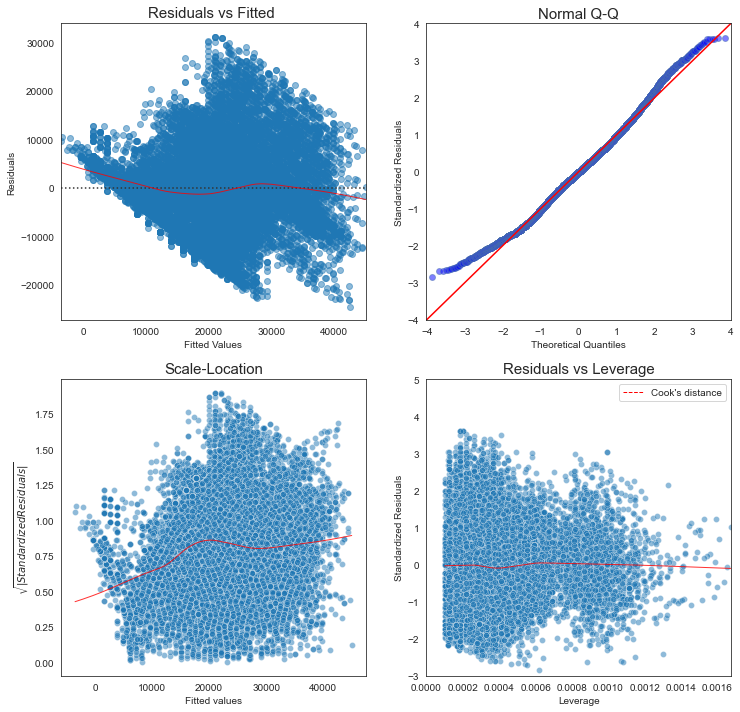

In [75]:
regression_plots(res,'product_wg_ton',pd.concat([Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train],axis=1))

In [76]:
# performance for train set
y_pred_lr_mod_tr = res.predict(Xs_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_lr_mod_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_lr_mod_tr))
print("R2 score: ", r2_score(y_train,y_pred_lr_mod_tr))

RMSE:  8611.68322255074
MAE:  6784.7879309357595
R2 score:  0.4506845187381755


In [77]:
# performance for test set
y_pred_lr_mod = res.predict(Xs_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr_mod)))
print("MAE: ", mean_absolute_error(y_test,y_pred_lr_mod))
print("R2 score: ", r2_score(y_test,y_pred_lr_mod))

RMSE:  8591.098662065093
MAE:  6785.172357166803
R2 score:  0.44960208393109735


As expected the RMSE value is also coming out to be very high.

## Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor()

In [80]:
rf.fit(Xs_train,y_train)

RandomForestRegressor()

In [81]:
# performance for train set
print("Performance for RF model for Train set (1st case)")
y_pred_rf_tr = rf.predict(Xs_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_rf_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_rf_tr))
print("R2 score: ", r2_score(y_train,y_pred_rf_tr))

Performance for RF model for Train set (1st case)
RMSE:  340.26393975214506
MAE:  248.65785085714285
R2 score:  0.9991424141650151


In [82]:
# performance for test set
print("Performance for RF model for Test set (1st case)")
y_pred_rf = rf.predict(Xs_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("MAE: ", mean_absolute_error(y_test,y_pred_rf))
print("R2 score: ", r2_score(y_test,y_pred_rf))

Performance for RF model for Test set (1st case)
RMSE:  902.6391058194631
MAE:  667.471232
R2 score:  0.9939241414098289


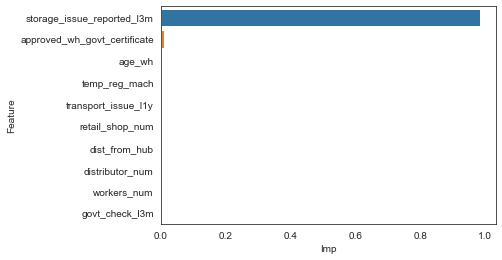

In [83]:
feat_imp_rfb = pd.DataFrame({'Feature': Xs_train.columns, 'Imp' :rf.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_rfb.head(10));

**Note -** These results were obtained without dropping the highly correlated feature i.e. `storage_issue_reported_l3m`

### After dropping the `storage_issue_reported_l3m` variable

In [84]:
rf = RandomForestRegressor()

In [85]:
rf.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

RandomForestRegressor()

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# performance for train set
print("Performance for RF model for Train set (2nd case)")
y_pred_rf_tr = rf.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_rf_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_rf_tr))
print("R2 score: ", r2_score(y_train,y_pred_rf_tr))

Performance for RF model for Train set (2nd case)
RMSE:  2980.125019594914
MAE:  2255.2734537142856
R2 score:  0.9342168426996951


In [88]:
# performance for test set
print("Performance for RF model for Test set (2nd case)")
y_pred_rf = rf.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("MAE: ", mean_absolute_error(y_test,y_pred_rf))
print("R2 score: ", r2_score(y_test,y_pred_rf))

Performance for RF model for Test set (2nd case)
RMSE:  7882.819969947468
MAE:  6031.886785333333
R2 score:  0.5366143463477575


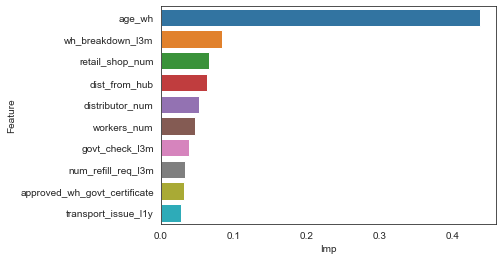

In [89]:
feat_imp_rfb = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns, 'Imp' :rf.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_rfb.head(10));

As we can observe, this random forest model is highly overfitting on the train data.

### Hyperparameter Tuning

In [90]:
param_grid_rf = {  'max_depth'         : [7], #[2,3,5,7],
                   'min_samples_leaf'  : [3], #[2,3,5],
                   'min_samples_split' : [30], #[2,3,10,30],
                   'n_estimators'      : [100] #[100, 200, 300],
                  }

In [91]:
from sklearn.metrics import make_scorer
scorer = make_scorer(r2_score, greater_is_better=True)

In [92]:
gs = GridSearchCV(rf,param_grid=param_grid_rf,n_jobs=-1,cv=5,scoring = scorer)

In [93]:
gs.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7], 'min_samples_leaf': [3],
                         'min_samples_split': [30], 'n_estimators': [100]},
             scoring=make_scorer(r2_score))

In [94]:
rfb = gs.best_estimator_
gs.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=30)

In [95]:
# performance for train set
print("Performance for RF model for Train set (3rd case)")
y_pred_rfb_tr = rfb.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_rfb_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_rfb_tr))
print("R2 score: ", r2_score(y_train,y_pred_rfb_tr))

Performance for RF model for Train set (3rd case)
RMSE:  7694.342271366893
MAE:  5884.811177596153
R2 score:  0.5614806624720619


In [96]:
# performance for test set
print("Performance for RF model for Test set (3rd case)")
y_pred_rfb = rfb.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rfb)))
print("MAE: ", mean_absolute_error(y_test,y_pred_rfb))
print("R2 score: ", r2_score(y_test,y_pred_rfb))

Performance for RF model for Test set (3rd case)
RMSE:  7796.561137616264
MAE:  5977.717133972833
R2 score:  0.5467001813456875


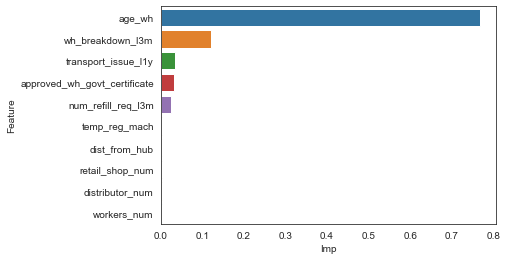

In [97]:
feat_imp_rfb = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns, 'Imp' :rfb.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_rfb.head(10));

As we can observe the model doesn't seem to perform well even after gridsearch

## SVR Model

In [98]:
from sklearn.svm import SVR

In [99]:
svr = SVR(kernel = 'linear')

In [100]:
svr.fit(Xs_train,y_train)

SVR(kernel='linear')

In [101]:
# performance for train set
print("Performance for SVR model for Train set (1st case)")
y_pred_svr_tr = svr.predict(Xs_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_svr_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_svr_tr))
print("R2 score: ", r2_score(y_train,y_pred_svr_tr))

Performance for SVR model for Train set (1st case)
RMSE:  2728.826038132791
MAE:  2059.2397483775426
R2 score:  0.944843405053282


In [102]:
# performance for test set
print("Performance for SVR model for Test set (1st case)")
y_pred_svr = svr.predict(Xs_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("MAE: ", mean_absolute_error(y_test,y_pred_svr))
print("R2 score: ", r2_score(y_test,y_pred_svr))

Performance for SVR model for Test set (1st case)
RMSE:  2745.981298606326
MAE:  2073.3034044565966
R2 score:  0.943769166888346


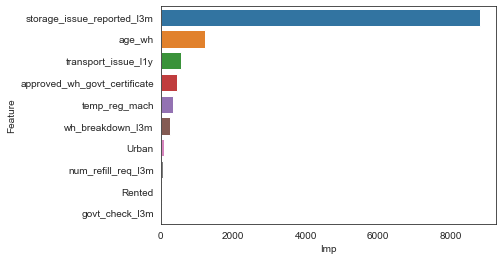

In [103]:
feat_imp_svr = pd.DataFrame({'Feature': Xs_train.columns, 'Imp' :abs(svr.coef_[0])}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_svr.head(10));

### After dropping the `storage_issue_reported_l3m` variable

In [104]:
svr = SVR(kernel = 'linear')

In [105]:
svr.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

SVR(kernel='linear')

In [106]:
# performance for train set
print("Performance for SVR model for Train set (2nd case)")
y_pred_svr_tr = svr.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_svr_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_svr_tr))
print("R2 score: ", r2_score(y_train,y_pred_svr_tr))

Performance for SVR model for Train set (2nd case)
RMSE:  8917.942088752596
MAE:  7006.604459285236
R2 score:  0.4109189635386459


In [107]:
# performance for test set
print("Performance for SVR model for Test set (2nd case)")
y_pred_svr = svr.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("MAE: ", mean_absolute_error(y_test,y_pred_svr))
print("R2 score: ", r2_score(y_test,y_pred_svr))

Performance for SVR model for Test set (2nd case)
RMSE:  8885.690078985055
MAE:  6988.947476844104
R2 score:  0.411208284349314


In [108]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

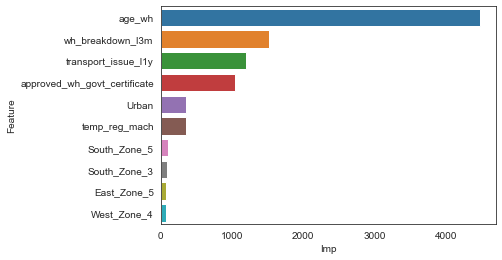

In [109]:
feat_imp_svr = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns, 'Imp' :abs(svr.coef_[0])}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_svr.head(10));

### Hyperparameter Tuning

In [110]:
svr = SVR()

In [111]:
param_grid_svr={
    'kernel' : ['linear'],
    'C'      : [10], #[0.1, 1,10],
    'gamma'  : [0.001] #[0.001, 0.1, 1]
}

In [112]:
gs = GridSearchCV(estimator=svr,param_grid=param_grid_svr, cv=5, scoring=scorer,verbose=1, n_jobs=-1)

In [113]:
gs.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10], 'gamma': [0.001], 'kernel': ['linear']},
             scoring=make_scorer(r2_score), verbose=1)

In [114]:
svr = gs.best_estimator_
gs.best_estimator_

SVR(C=10, gamma=0.001, kernel='linear')

In [115]:
# performance for train set
print("Performance for SVR model for Train set (3rd case)")
y_pred_svr_tr = svr.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_svr_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_svr_tr))
print("R2 score: ", r2_score(y_train,y_pred_svr_tr))

Performance for SVR model for Train set (3rd case)
RMSE:  8651.030378388137
MAE:  6757.336244518564
R2 score:  0.4456533584078861


In [116]:
# performance for test set
print("Performance for SVR model for Test set (3rd case)")
y_pred_svr = svr.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("MAE: ", mean_absolute_error(y_test,y_pred_svr))
print("R2 score: ", r2_score(y_test,y_pred_svr))

Performance for SVR model for Test set (3rd case)
RMSE:  8640.089484997083
MAE:  6767.289624046715
R2 score:  0.44330688690892683


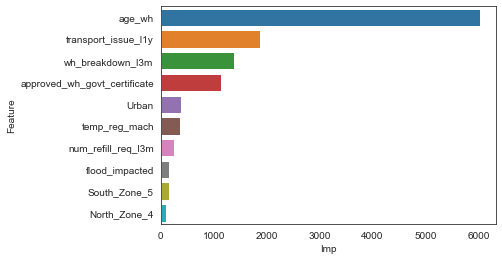

In [117]:
feat_imp_svr = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns, 'Imp' :abs(svr.coef_[0])}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_svr.head(10));

As we can see the perfomance of SVR is still not good enough compared to the random forest model. Let's try boosting algorithms.

## XGboost Model

In [118]:
from xgboost import XGBRegressor

In [119]:
xgb =  XGBRegressor() 

In [120]:
xgb.fit(Xs_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [121]:
# performance for train set
print("Performance for XGBoost model for Train set (1st case)")
y_pred_xgb_tr = xgb.predict(Xs_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_xgb_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_xgb_tr))
print("R2 score: ", r2_score(y_train,y_pred_xgb_tr))

Performance for XGBoost model for Train set (1st case)
RMSE:  613.0972806869889
MAE:  466.26698404017856
R2 score:  0.9972157737328323


In [122]:
# performance for test set
print("Performance for XGBoost model for Test set (1st case)")
y_pred_xgb = xgb.predict(Xs_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("MAE: ", mean_absolute_error(y_test,y_pred_xgb))
print("R2 score: ", r2_score(y_test,y_pred_xgb))

Performance for XGBoost model for Test set (1st case)
RMSE:  883.77882197013
MAE:  652.4115538736979
R2 score:  0.9941753940654985


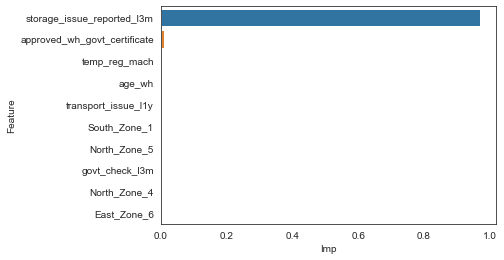

In [123]:
feat_imp_xgb = pd.DataFrame({'Feature': Xs_train.columns, 'Imp' :xgb.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_xgb.head(10));

### After dropping the `storage_issue_reported_l3m` variable

In [124]:
xgb = XGBRegressor()

In [125]:
xgb.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [126]:
# performance for train set
print("Performance for XGBoost model for Train set (2nd case)")
y_pred_xgb_tr = xgb.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred_xgb_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_xgb_tr))
print("R2 score: ", r2_score(y_train,y_pred_xgb_tr))

Performance for XGBoost model for Train set (2nd case)
RMSE:  5903.952142813172
MAE:  4463.193529165867
R2 score:  0.7418147642862238


In [127]:
# performance for test set
print("Performance for XGBoost model for Test set (2nd case)")
y_pred_xgb = xgb.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("MAE: ", mean_absolute_error(y_test,y_pred_xgb))
print("R2 score: ", r2_score(y_test,y_pred_xgb))

Performance for XGBoost model for Test set (2nd case)
RMSE:  8085.879328288185
MAE:  6251.144921369299
R2 score:  0.5124334764661822


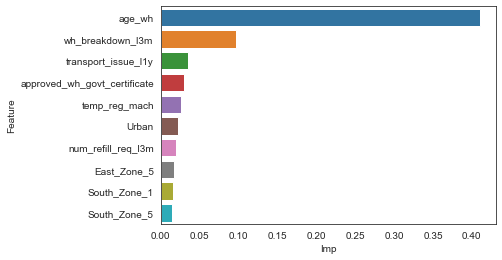

In [128]:
feat_imp_xgb = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns, 'Imp' :xgb.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_xgb.head(10));

As we can observe from this xgb model is overfitting on the training data. let's try gridsearch method for hyperparameter tuning.

### Hyperparameter Tuning

In [129]:
xgb = XGBRegressor()

In [130]:
param_grid_xgb={  'n_estimators'      : [100],#[100,200],
                  'max_depth'         : [3],#[3,5,7],
                  'min_child_weight'  : [5],#[1,3,5],
                  'gamma'             : [0],#[0,0.1,0.2],
                  'learning_rate'     : [0.1],#[0.01,0.1]
}

In [131]:
gs = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb, cv=5, scoring=scorer,verbose=2, n_jobs=-1)

In [132]:
gs.fit(Xs_train.drop('storage_issue_reported_l3m',axis=1),y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n..._jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                      

In [133]:
xgb_b = gs.best_estimator_
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [134]:
# Peformance of model for train set
print("Performance for XGBoost model for Train set (3rd case)")
y_pred_xgb_b_tr = xgb_b.predict(Xs_train.drop('storage_issue_reported_l3m',axis=1))
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_xgb_b_tr)))
print("MAE: ", mean_absolute_error(y_train,y_pred_xgb_b_tr))
print('R2 score:',r2_score(y_train,y_pred_xgb_b_tr))

Performance for XGBoost model for Train set (3rd case)
RMSE: 7687.85416609965
MAE:  5910.950099546596
R2 score: 0.5622198965639169


In [135]:
# Peformance of model for test set
print("Performance for XGBoost model for Test set (3rd case)")
y_pred_xgb_b = xgb_b.predict(Xs_test.drop('storage_issue_reported_l3m',axis=1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xgb_b)))
print("MAE: ", mean_absolute_error(y_test,y_pred_xgb_b))
print('R2 score:',r2_score(y_test,y_pred_xgb_b))

Performance for XGBoost model for Test set (3rd case)
RMSE: 7744.525291558584
MAE:  5962.276751790365
R2 score: 0.5527308207853063


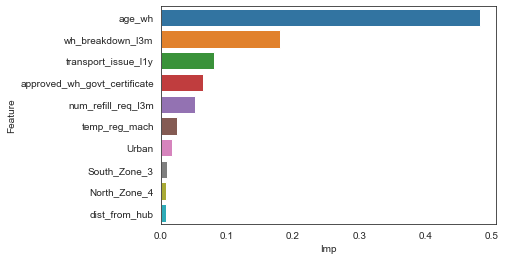

In [136]:
feat_imp_xgb = pd.DataFrame({'Feature': Xs_train.drop('storage_issue_reported_l3m',axis=1).columns,
                             'Imp' :xgb_b.feature_importances_}).sort_values(by='Imp',ascending=False)
sns.barplot(y='Feature',x='Imp',data=feat_imp_xgb.head(10));

As we can see that the even after looking for best parameters the performance does not seem to improve much.

Now, since the performance is fairly similar for both train and validation set, we can say the XGBoost model is fitting good enough when compared with other models.

# Thank you for going through this notebook!